<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Dayana Navarro Valencia y Juan Pablo Ruiz Magaña

**Fecha:** 8 de marzo del 2021

**Expediente** : if721470
**Profesor:** Oscar David Jaramillo Zuluaga.

## Link de Github:

# Tarea 5: Clase 9_GenDistribucionProbabilidad

## Enunciado de tarea
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).



### SOLUCION JUAN PABLO

In [1]:
# Código de solución 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Encontrando la inversa de la función e igualandola a U


$\frac{2}{\pi}\sin^{-1}(\sqrt x)=U$


$\sin^{-1}(\sqrt x) = \frac{U\pi}{2}$


$\sqrt x = \sin^{-1}\frac{U\pi}{2}$


$x = (\sin^{-1}\frac{U\pi}{2})^2$

In [2]:
# función
N = 1000
def D_continua(N):
    return (np.sin((np.random.random(N)*np.pi)/2))**2

In [3]:
x = D_continua(N)

## Comprobación calculando la derivada

${ F(x) = \frac{2}{\pi}\sin^{-1}(\sqrt{x})}$


${\frac{dF(x)}{dx} =  \frac{2}{\pi}\sin^{-1}(a)}$



Con $ a = \sqrt{x} $

###### Derivando a se obtiene:

${\frac{d}{dx} = \frac{1}{2\sqrt{x}}}$

###### Recordando la derivada arcoseno:

${\frac{d}{dx} = \frac{1}{\sqrt{1-x^2}}}$

###### Volviendo a la derivada principal nos queda:
${\frac{dF(x)}{dx} = \frac{2}{\pi} \frac{1}{\sqrt{1-a^2}} a'}$

###### Evaluando el valor de a y a':
${\frac{dF(x)}{dx} = \frac{2}{\pi \sqrt{1-\sqrt{x}^2}} \frac{1}{2\sqrt{x}}}$ 

###### Simplicando:
${\frac{dF(x)}{dx} = \frac{1}{\pi\sqrt{(1-x)x}}}$

${\frac{dF(x)}{dx} = \frac{1}{\pi\sqrt{-(x-1)x}}}$

In [4]:
# función de densidad 
der = lambda x: 1/(np.pi * np.sqrt(-1*(x-1)*x))
x1 = np.arange(0,1,0.001)

<ipython-input-4-1d1b5323332d>:2: RuntimeWarning: divide by zero encountered in true_divide
  der = lambda x: 1/(np.pi * np.sqrt(-1*(x-1)*x))


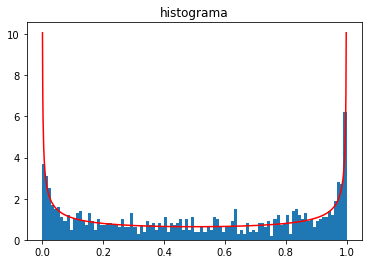

In [5]:
plt.title('Ejercicio1')
plt.plot(x1,der(x1),'-r')
plt.hist(x,100,density=True)
plt.title('histograma')
plt.show()

#### Ej 2

In [6]:
#parametros
n = 10
p = 0.7

In [7]:
# función para calcular la probabilidad acumulada

def bin_acum(n,p):
    v = np.zeros(n)
    v[0] = (1-p)**n
    def llenado(i):
        nonlocal v
        
        v[i+1]=(((n-i)/(i+1))*(p/(1-p)))*v[i]
        
    
    [llenado(i) for i in range(n-1)]
    return np.cumsum(v)

#### Recordando las funciones vistas en clase.

In [8]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

In [9]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

In [10]:
p_acum = bin_acum(n,p)
p_acum

array([5.90490000e-06, 1.43685900e-04, 1.59038640e-03, 1.05920784e-02,
       4.73489874e-02, 1.50268333e-01, 3.50389282e-01, 6.17217214e-01,
       8.50691654e-01, 9.71752475e-01])

In [11]:
t_binom = Gen_distr_discreta(p_acum,np.arange(0, n+1),N)

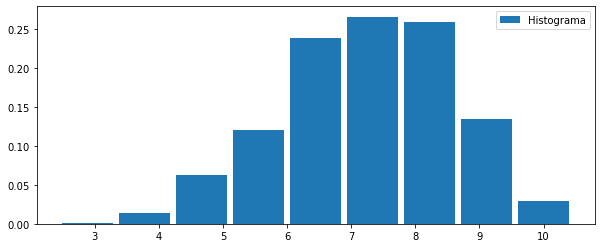

In [12]:
plot_histogram_discrete(t_binom,'Histograma')

### SOLUCION DAYANA

In [1]:
# Código de solución 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial
from scipy.special import comb # Importamos la función combinatoria
from scipy import stats
import pandas as pd

%matplotlib inline

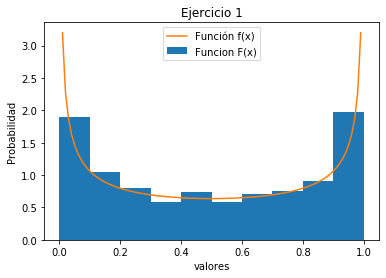

In [5]:

#EJERCICIO 1

N = 1000
x= (np.sin((np.pi/2)*(np.random.random(N))))**2
a= np.arange(0.01,1,0.01)
fx = 1/((np.pi*np.sqrt(a))*(np.sqrt(1-a)))
plt.hist(x,density=True, label ='Funcion F(x)')
plt.plot(a, fx, label = 'Función f(x)')
plt.legend()
plt.title('Ejercicio 1')
plt.xlabel('valores')
plt.ylabel('Probabilidad')
plt.show()


In [6]:
# EJERCICO 2

# Sacado de la clase 10






def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

In [7]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

In [8]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

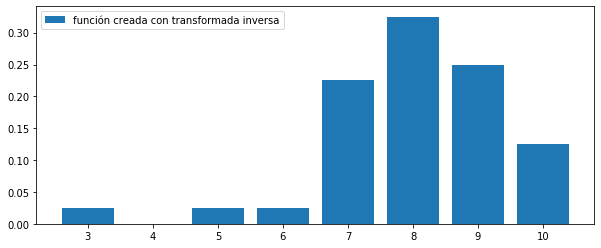

In [9]:
n = 10; p = 0.7; N=10*4

p_acum = P_acum_Binomial_o(n,p)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(p_acum , np.arange(0, n+1), N)
plot_histogram_discrete(d_binomial, 'función creada con transformada inversa')